# Netflix Shows 
Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

The main variable analyzed will be the user rating score. We will analyze correlations and use graphs to show how level rating (ie. pg13, R, pg) and release year can impact the likability of a Neftflix show.

## View Train Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read Files:
#netflix=r'/kaggle/input/netflix-showse/netflix.csv'
netflix=r'C:\Users\sschm\Desktop\Kaggle\netflix.csv'
data=pd.read_csv(netflix)

#Drop Duplicates:
data=data.drop_duplicates()

#Display Data:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### Drop NaN values from user rating score column
Since user rating score is the main feature we are trying to analyze, we must delete those rows.

In [2]:
findNA=data.isnull().sum().sort_values(ascending=False)/len(data)
print(findNA)
df = data.dropna(subset=['user rating score'])

user rating score    0.488
ratingLevel          0.066
title                0.000
rating               0.000
ratingDescription    0.000
release year         0.000
user rating size     0.000
dtype: float64


## Search for Outliers:
Since the last column is the size of the sample, I check all values for that column. If a certain movie has a very small sample size, that movie should be conisdered to be deleted. In this case, all the sample sizes were 80 so there are no outliers that need to be removed.

In [3]:
df['user rating size'].unique()

array([80], dtype=int64)

## Show Rating Level Impacts Rating  
Neflix users emjoy the TV-MA, R, and TV-14 shows the most. This is not a huge surprise as most of the popular netflix shows tend to be for adult audience such as Squid Games, Breaking Bad, and The Walking Dead.


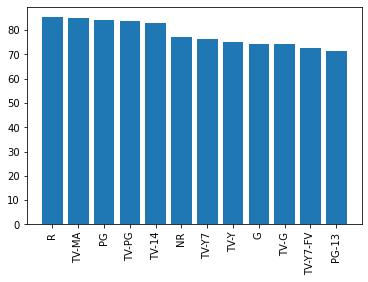

In [4]:
ratingGb=df.groupby('rating')['user rating score'].mean().sort_values(ascending=False).round(2).reset_index()
x=ratingGb['rating']
y=ratingGb['user rating score']
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

## Sort Movies by Year 
The most liked movies are the most recent year from the data which happened to be 2017. However, there is little correlation, 0.5025 between year of the movie and how much customers enjoy a show. 

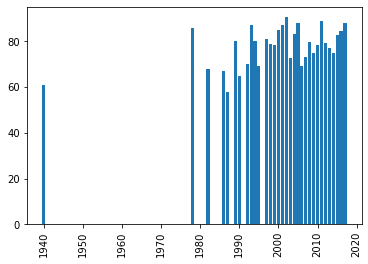

0.5025  The correlation between year and show rating.


In [5]:
#Group data by year:
yearGb=df.groupby('release year')['user rating score'].mean().round(2).reset_index()

#Bar plot data:
x=yearGb['release year']
y=yearGb['user rating score']
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

#Find correlation:
corrYear=x.corr(y).round(4)
print(corrYear, " The correlation between year and show rating.")

## References
1. https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda#Movie-ratings-analysis